<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Replication-of-McMillen-et-al.-(2017)" data-toc-modified-id="Replication-of-McMillen-et-al.-(2017)-1">Replication of McMillen et al. (2017)</a></span><ul class="toc-item"><li><span><a href="#Load-and-prepare-data" data-toc-modified-id="Load-and-prepare-data-1.1">Load and prepare data</a></span><ul class="toc-item"><li><span><a href="#Schools" data-toc-modified-id="Schools-1.1.1">Schools</a></span></li><li><span><a href="#Routes" data-toc-modified-id="Routes-1.1.2">Routes</a></span><ul class="toc-item"><li><span><a href="#Add-treatment-indicator-from-schools" data-toc-modified-id="Add-treatment-indicator-from-schools-1.1.2.1">Add treatment indicator from schools</a></span></li></ul></li><li><span><a href="#Blocks-with-running-variable-for-Figure-3" data-toc-modified-id="Blocks-with-running-variable-for-Figure-3-1.1.3">Blocks with running variable for Figure 3</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-1.1.3.1">Prepare</a></span></li></ul></li><li><span><a href="#Yearly-crime-counts" data-toc-modified-id="Yearly-crime-counts-1.1.4">Yearly crime counts</a></span></li></ul></li><li><span><a href="#Replication-of-descriptives" data-toc-modified-id="Replication-of-descriptives-1.2">Replication of descriptives</a></span><ul class="toc-item"><li><span><a href="#Figure-A.2" data-toc-modified-id="Figure-A.2-1.2.1">Figure A.2</a></span></li><li><span><a href="#Table-1" data-toc-modified-id="Table-1-1.2.2">Table 1</a></span></li><li><span><a href="#Figure-3" data-toc-modified-id="Figure-3-1.2.3">Figure 3</a></span></li></ul></li><li><span><a href="#Replication-of-main-results" data-toc-modified-id="Replication-of-main-results-1.3">Replication of main results</a></span><ul class="toc-item"><li><span><a href="#Table-10-(column-3-and-7)" data-toc-modified-id="Table-10-(column-3-and-7)-1.3.1">Table 10 (column 3 and 7)</a></span><ul class="toc-item"><li><span><a href="#Reduced-estimation-dataset" data-toc-modified-id="Reduced-estimation-dataset-1.3.1.1">Reduced estimation dataset</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Additional-figures-for-website" data-toc-modified-id="Additional-figures-for-website-2">Additional figures for website</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1">Load data</a></span><ul class="toc-item"><li><span><a href="#Blocks-with-crimes" data-toc-modified-id="Blocks-with-crimes-2.1.1">Blocks with crimes</a></span></li><li><span><a href="#Routes" data-toc-modified-id="Routes-2.1.2">Routes</a></span></li><li><span><a href="#Hourly-crime-counts" data-toc-modified-id="Hourly-crime-counts-2.1.3">Hourly crime counts</a></span></li></ul></li><li><span><a href="#Plot-blocks-with-dummies" data-toc-modified-id="Plot-blocks-with-dummies-2.2">Plot blocks with dummies</a></span></li><li><span><a href="#Plot-violent-crime-trends" data-toc-modified-id="Plot-violent-crime-trends-2.3">Plot violent crime trends</a></span><ul class="toc-item"><li><span><a href="#Hourly-counts" data-toc-modified-id="Hourly-counts-2.3.1">Hourly counts</a></span></li></ul></li><li><span><a href="#Violent-crimes-split-by-FBI-Code" data-toc-modified-id="Violent-crimes-split-by-FBI-Code-2.4">Violent crimes split by FBI Code</a></span></li><li><span><a href="#Illustration-of-difference-in-differences-(DiD)" data-toc-modified-id="Illustration-of-difference-in-differences-(DiD)-2.5">Illustration of difference in differences (DiD)</a></span></li></ul></li></ul></div>

**Description**: This notebook creates all figures and displays the results used on the website [Chicago's Safe Passage Program to Prevent Crime: Is It Worth the Dime?](https://binste.github.io/chicago_safepassage_evaluation/). Some of the figures, descriptive statistics and the main results are a replication of the census block results from [McMillen et al. (2017)](https://ignaciomsarmiento.github.io/assets/Safe_Passage_WP.pdf). Therefore, the first part of the notebook will make direct comparisons to the relevant parts of the beforementioned paper. The second part produces additional figures for the website which are unrelated to McMillen et al. (2017).

**Usage**: Run all cells (Cell -> Run All) to get a correct output of the figures.

In [1]:
%matplotlib inline

import calendar
import pickle
import sys
from pathlib import Path

import altair as alt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from altair import datum

sys.path.append('../..')
from src.analysis.figures import format_chart, save_to_jekyll
from src.prepare_data.crime_database import load_relevant_crimes

plt.style.use('seaborn-white')

In [2]:
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 13

In [3]:
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Set path to data folder

In [4]:
project_folder = Path('../..')
data_path = project_folder / 'data'

# Replication of McMillen et al. (2017)
Only main results of census block specification.

## Load and prepare data

### Schools

In [5]:
with (data_path / 'processed/schools_blocks.pkl').open('rb') as f:
    schools = pickle.load(f)
schools['treated'] = schools['treated_foia']
schools = schools.drop('treated_foia', axis='columns')

### Routes

In [6]:
with (data_path / 'processed/routes.pkl').open('rb') as f:
    routes = pickle.load(f)

#### Add treatment indicator from schools

Add earlier school years

In [7]:
school_years = ['SY0910', 'SY1011', 'SY1112', 'SY1213']
earlier_routes = []
routes_1314 = routes.query('school_year == "SY1314"')
for sy in school_years:
    temp_routes = routes_1314.copy()
    temp_routes['school_year'] = sy
    earlier_routes.append(temp_routes)

routes = pd.concat([routes] + earlier_routes, ignore_index=True)

In [8]:
assert not routes.duplicated(subset=['school_year', 'route_number']).any()

In [9]:
routes = routes.merge(
    schools[['school_name', 'school_year', 'treated']],
    how='left',
    on=['school_name', 'school_year'], validate='m:1')

### Blocks with running variable for Figure 3

In [10]:
with (data_path / 'processed/figures/blocks_fig_3.pkl').open('rb') as f:
    blocks_fig_3 = pickle.load(f)
blocks_fig_3 = blocks_fig_3.query('run_var != 3')

In [11]:
blocks_fig_3.head()

,tract_bloc,school_year,violent_count,property_count,treated,one_over,two_over,three_over,info,run_var_treated,run_var_one,run_var_two,run_var_three,run_var,block_status
3,208011000.0,SY0809,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-5.0,-5.0,Three over
4,208011000.0,SY0910,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-4.0,-4.0,Three over
5,208011000.0,SY1011,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-3.0,-3.0,Three over
6,208011000.0,SY1112,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-2.0,-2.0,Three over
7,208011000.0,SY1213,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-1.0,-1.0,Three over


#### Prepare

First, devide all crime counts by number of weekdays for respective school year. These have to be first calculated:

In [12]:
def count_weekdays(year, month):
    """Counts number of weekdays per given month.
    
    Parameters
    ----------
    year : int
        Year of month
    
    month : int
    
    Returns
    -------
    int
        Number of weekdays in given month
    """
    weekday_count = 0
    cal = calendar.Calendar()

    for day, wday_number in cal.itermonthdays2(year, month):
        # day == 0 would mean that it is not a day of
        # this month
        # wday_number in (5, 6) -> weekends
        if day > 0 and wday_number <= 4:
            weekday_count += 1
    return weekday_count

In [13]:
sy_range = {
    sy: [(int(f'20{sy[2:4]}'), [9, 10, 11, 12]), (int(f'20{sy[4:]}'), [1, 2, 3, 4, 5, 6])]
    for sy in [
        'SY0607', 'SY0708', 'SY0809', 'SY0910', 'SY1011', 'SY1112',
        'SY1213', 'SY1314', 'SY1415', 'SY1516'
    ]
}
# Add SY0506 separate, as I only use data starting from January 2001
sy_range['SY0506'] = [(2006, [1, 2, 3, 4, 5, 6])]
sy_range

{'SY0607': [(2006, [9, 10, 11, 12]), (2007, [1, 2, 3, 4, 5, 6])],
 'SY0708': [(2007, [9, 10, 11, 12]), (2008, [1, 2, 3, 4, 5, 6])],
 'SY0809': [(2008, [9, 10, 11, 12]), (2009, [1, 2, 3, 4, 5, 6])],
 'SY0910': [(2009, [9, 10, 11, 12]), (2010, [1, 2, 3, 4, 5, 6])],
 'SY1011': [(2010, [9, 10, 11, 12]), (2011, [1, 2, 3, 4, 5, 6])],
 'SY1112': [(2011, [9, 10, 11, 12]), (2012, [1, 2, 3, 4, 5, 6])],
 'SY1213': [(2012, [9, 10, 11, 12]), (2013, [1, 2, 3, 4, 5, 6])],
 'SY1314': [(2013, [9, 10, 11, 12]), (2014, [1, 2, 3, 4, 5, 6])],
 'SY1415': [(2014, [9, 10, 11, 12]), (2015, [1, 2, 3, 4, 5, 6])],
 'SY1516': [(2015, [9, 10, 11, 12]), (2016, [1, 2, 3, 4, 5, 6])],
 'SY0506': [(2006, [1, 2, 3, 4, 5, 6])]}

In [14]:
sy_weekdays = {}
for sy, year_months in sy_range.items():
    sy_counter = 0
    for year, months in year_months:
        for month in months:
            sy_counter += count_weekdays(year, month)
    sy_weekdays[sy] = sy_counter
sy_weekdays

{'SY0607': 216,
 'SY0708': 216,
 'SY0809': 217,
 'SY0910': 217,
 'SY1011': 217,
 'SY1112': 217,
 'SY1213': 215,
 'SY1314': 216,
 'SY1415': 217,
 'SY1516': 218,
 'SY0506': 130}

In [15]:
blocks_fig_3['violent_count_per_wday'] = blocks_fig_3.apply(
    lambda row: row['violent_count'] / sy_weekdays[row['school_year']], axis=1)
blocks_fig_3['property_count_per_wday'] = blocks_fig_3.apply(
    lambda row: row['property_count'] / sy_weekdays[row['school_year']], axis=1)
blocks_fig_3.query('violent_count != 0').head()

,tract_bloc,school_year,violent_count,property_count,treated,one_over,two_over,three_over,info,run_var_treated,run_var_one,run_var_two,run_var_three,run_var,block_status,violent_count_per_wday,property_count_per_wday
16,208011015.0,SY1011,1.0,1.0,0.0,0,0,0,-,NaN,NaN,NaN,-3.0,-3.0,Three over,0.004608,0.004608
21,208011015.0,SY1516,1.0,1.0,0.0,0,0,1,three over,NaN,NaN,NaN,2.0,2.0,Three over,0.004587,0.004587
26,208014000.0,SY0910,1.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-4.0,-4.0,Three over,0.004608,0.000000
32,208014000.0,SY1516,1.0,0.0,0.0,0,0,1,three over,NaN,NaN,NaN,2.0,2.0,Three over,0.004587,0.000000
54,208021015.0,SY1516,1.0,0.0,0.0,0,0,1,three over,NaN,NaN,NaN,2.0,2.0,Three over,0.004587,0.000000


In [16]:
blocks_fig_3 = blocks_fig_3.groupby(['run_var', 'block_status']).agg({
    'violent_count':
    'mean',
    'property_count':
    'mean',
    'violent_count_per_wday':
    'mean',
    'property_count_per_wday':
    'mean'
}).reset_index()

In [17]:
blocks_fig_3.head()

,run_var,block_status,violent_count,property_count,violent_count_per_wday,property_count_per_wday
0,-5.0,One over,0.255826,1.123252,0.001179,0.005178
1,-5.0,Three over,0.205269,0.949273,0.000946,0.004375
2,-5.0,Treated,0.418735,1.427542,0.001930,0.006580
3,-5.0,Two over,0.275023,1.078512,0.001268,0.004971
4,-4.0,One over,0.235654,0.907661,0.001326,0.004986


### Yearly crime counts

In [18]:
with (data_path / 'processed/figures/violent_yearly_counts.pkl').open('rb') as f:
    yearly_crime_counts = pickle.load(f)
yearly_crime_counts['violent'] = yearly_crime_counts['violent'].map({0: 'Property', 1: 'Violent'})

## Replication of descriptives

### Figure A.2
![figure_a2](../../reports/figures/mcmillen_fig_a2.png)

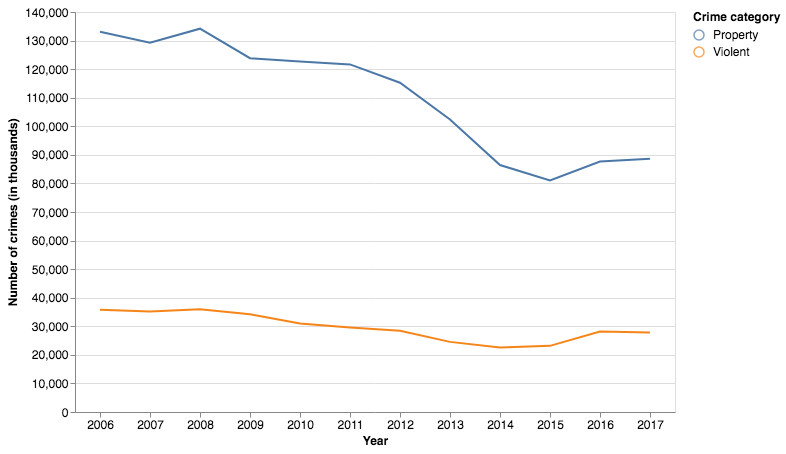

In [19]:
yearly_violent_trend = alt.Chart(yearly_crime_counts).mark_line().encode(
    alt.X('Date:O', axis=alt.Axis(title='Year', labelAngle=0)),
    alt.Y('count:Q', axis=alt.Axis(title='Number of crimes (in thousands)')),
    alt.Color('violent:N',
              legend=alt.Legend(title='Crime category')))
tooltips = yearly_violent_trend.mark_point().encode(
    opacity=alt.value(0),
    tooltip='count'
)
yearly_violent_trend = format_chart(yearly_violent_trend + tooltips)
yearly_violent_trend

In [20]:
save_to_jekyll(yearly_violent_trend, 'yearly_violent_trend')

### Table 1
![table_1](../../reports/figures/mcmillen_tab_1.png)

In [21]:
table_1 = schools.groupby('school_year')['treated'].sum().diff().rename(
    'schools_added').reset_index()
table_1.loc[table_1['school_year'] == 'SY0910', 'schools_added'] = schools.loc[
    schools['school_year'] == 'SY0910', 'treated'].sum()
table_1_routes = routes.groupby('school_year')['treated'].sum().diff().rename(
    'routes_added').reset_index()
table_1_routes.loc[table_1_routes['school_year'] == 'SY0910',
                   'routes_added'] = routes.loc[routes['school_year'] ==
                                                'SY0910', 'treated'].sum()
table_1 = pd.merge(table_1_routes, table_1, how='inner', on='school_year')
table_1 = pd.concat(
    [
        table_1,
        pd.DataFrame.from_dict([{
            'school_year': 'total',
            'routes_added': table_1['routes_added'].sum(),
            'schools_added': table_1['schools_added'].sum()
        }])
    ],
    sort=True,
    ignore_index=True)
table_1 = table_1[['school_year', 'routes_added', 'schools_added']]
table_1

,school_year,routes_added,schools_added
0,SY0910,32.0,35.0
1,SY1011,0.0,0.0
2,SY1112,0.0,0.0
3,SY1213,4.0,4.0
4,SY1314,50.0,53.0
5,SY1415,34.0,41.0
6,SY1516,3.0,3.0
7,total,123.0,136.0


### Figure 3

>*"Given the phased way the program was implemented, we normalize to a common start and show the averages for the five pre-program years and for three post-program years. Figure 3a and 3b show that the program was indeed implemented in areas with higher crime incidents but there are no obvious differences in trends before the program implementation. Furthermore, control cells show no significant differences in levels or trends. What is more, after the implementation in the program there’s a drop in the average number of crimes when compared to control areas."* - McMillen et al. (2017), p. 10

Assumption: For figure, drop all blocks which switch status.

![Figure 3](../../reports/figures/mcmillen_fig_3.png)

>*"Note: The figures show average violent and property crime in Safe Passage Cells, One Cell Over, Two Cells Over and Three Cells during week days when school is in session. Given the asynchronicity of the program’s rollover of the program, we normalize to zero the last school year and the first year of the program on each cell. The dotted red line marks the end of the pre Safe Passage years and the start of the program."* - McMillen et al. (2017), p. 34

In [22]:
text_labels = [f'{i}\n school\n years\n prior' for i in range(2, 6)][::-1]
text_labels = text_labels + [
    '1\n school\n year\n prior', '1st\n school\n year\n after', '2nd\n school\n year\n after',
    '3rd\n school\n year\n after'
]

In [23]:
def add_block_group(before, after, ax, block_group, color, count_col):
    """Helper function for plotting the difference in difference graphs.
    It adds the pre and post implementation lines for a given block group.
    
    Parameters
    ----------
    before : pd.DataFrame
        Contains data on years before the implementation
        of the program
        
    after : pd.DataFrame
        Contains data on years after the implementation
        of the program
        
    ax : matplotlib.axes._subplots.AxesSubplot
        Ax to which lines should be added
        
    block_group : str
        Name of block group
        
    color : str
        Name of color to use for lines
        
    count_col : str
        Name of column which contains y values
        
    Returns
    -------
    Nothing    
    """
    before[before['block_status'] == block_group].plot(
        'run_var', count_col, ax=ax, color=color, label=block_group)
    after[after['block_status'] == block_group].plot(
        'run_var', count_col, ax=ax, color=color, label='')

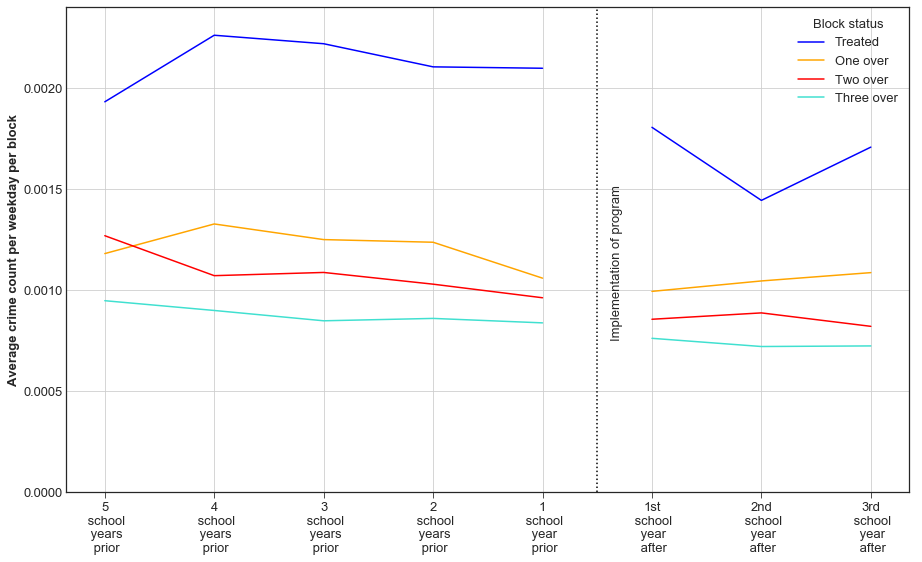

In [24]:
def plot_did(count_col, f_name, ylim):
    """Plots a difference in difference graph
    and saves it.
    
    Parameters
    ----------
    count_col : str
        Name of column which contains y values
        
    f_name : str
        File name without ending 
        (used for saving the figure)
        
    ylim : tuple of floats, (lower limit, upper limit)
        Contains the lower and upper y limits
        
    Returns
    -------
    Nothing
    """
    fig, ax = plt.subplots()
    before = blocks_fig_3.query('run_var < 0')
    after = blocks_fig_3.query('run_var >= 0')

    add_block_group(before, after, ax, 'Treated', 'blue', count_col)
    add_block_group(before, after, ax, 'One over', 'orange', count_col)
    add_block_group(before, after, ax, 'Two over', 'red', count_col)
    add_block_group(before, after, ax, 'Three over', 'turquoise', count_col)

    plt.xticks(range(-5, 4), text_labels)
    ax.tick_params(axis='x', which='major', length=6)

    ax.set_xlabel('')
    ax.set_ylabel('Average crime count per weekday per block')
    ax.legend(title='Block status')
    ax.set_ylim(*ylim)
    
    ax.vlines(-0.5, 0, ylim[1], linestyles='dotted')
    plt.figtext(0.66, 0.65, 'Implementation of program', rotation=90)
    ax.grid(True)
    plt.tight_layout()
    plt.savefig(f'../../docs/figures/{f_name}.png', dpi=800, transparent=True)
    
plot_did('violent_count_per_wday', 'didfigureviolent', (0, 0.0024))

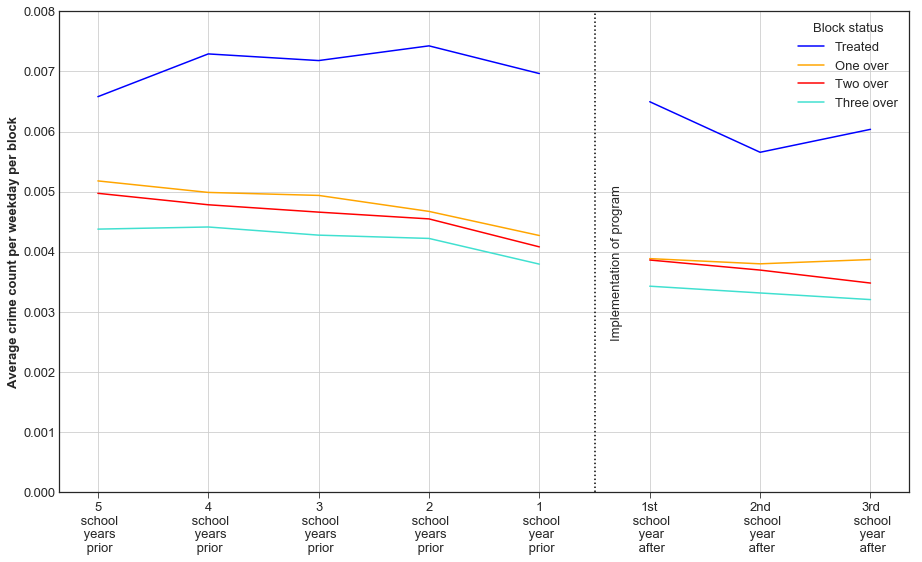

In [25]:
plot_did('property_count_per_wday', 'didfigureproperty', (0, 0.008))

## Replication of main results

### Table 10 (column 3 and 7)
![table_10](../../reports/figures/mcmillen_tab_10.png)

The poisson regression is run in `0.0-binste-estimation-poisson.ipynb`. The estimation notebook can NOT be run in mybinder.org due to resource constraints.

In [26]:
results_violent = pd.read_csv('../../models/summary_poisson_violent.csv')
results_violent

,var,coef,se,z,p,n
0,treated,-0.133810,0.024804,-5.394745,6.862095e-08,1085334
1,one_over,0.009624,0.024244,0.396950,6.914045e-01,1085334
2,two_over,-0.004373,0.024365,-0.179467,8.575707e-01,1085334


In [27]:
results_property = pd.read_csv('../../models/summary_poisson_property.csv')
results_property

,var,coef,se,z,p,n
0,treated,-0.004190,0.013136,-0.318989,0.749735,1460786
1,one_over,0.011522,0.012533,0.919355,0.357910,1460786
2,two_over,0.021531,0.012167,1.769625,0.076790,1460786


#### Reduced estimation dataset
Basis is the dataset used to obtain the results in the previous section with the additional restriction of only 5 pre-implementation school years and 3 after-implementation school years per block. Figure 3 in McMillen et al. (2017) seem to use this data and it is not clear to me if they also used it for the regressions.

In [28]:
results_violent_reduced = pd.read_csv('../../models/summary_poisson_violent_reduced.csv')
results_violent_reduced

,var,coef,se,z,p,n
0,treated,-0.160182,0.032536,-4.923153,8.516074e-07,569482
1,one_over,0.018498,0.032951,0.561387,5.745339e-01,569482
2,two_over,-0.031829,0.034025,-0.935453,3.495549e-01,569482


In [29]:
results_property_reduced = pd.read_csv('../../models/summary_poisson_property_reduced.csv')
results_property_reduced

,var,coef,se,z,p,n
0,treated,0.005035,0.016859,0.298674,0.765189,844310
1,one_over,-0.000997,0.016790,-0.059357,0.952668,844310
2,two_over,0.038549,0.016628,2.318407,0.020427,844310


# Additional figures for website
The figures in the following are for the website only and do not directly belong to the replication.

Care with this setting. `max_rows=None` should only be used when exporting to html. Don't display large figures in this notebook!

In [30]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

## Load data

### Blocks with crimes
This dataset contains an observation per block per school year

In [31]:
with (data_path / 'processed/figures/blocks_with_dummies.pkl').open('rb') as f:
    blocks_dummies = pickle.load(f)
blocks_dummies = blocks_dummies[['tract_bloc', 'school_year', 'info']]
assert not blocks_dummies.duplicated(subset=['tract_bloc', 'school_year']).any()
blocks_dummies.head()

,tract_bloc,school_year,info
0,101001000,SY0506,-
1,101001001,SY0506,-
2,101001002,SY0506,-
3,101001003,SY0506,-
4,101002000,SY0506,-


### Routes

In [32]:
with (data_path / 'processed/routes.pkl').open('rb') as f:
    routes = pickle.load(f)
routes.head()

,school_name,school_id,school_year,route_number,geometry
0,Bass,609791,SY1516,26,(LINESTRING (-87.65435458421847 41.77415375372...
1,Haley,609808,SY1516,21,(LINESTRING (-87.63829660445114 41.67785424533...
2,Wentworth,610223,SY1516,22,(LINESTRING (-87.66139078533355 41.76494287260...
3,Mays,610290,SY1516,23,(LINESTRING (-87.64702376241898 41.77243973026...
4,Nicholson Tech Acad,609793,SY1516,24,(LINESTRING (-87.65473745700072 41.78870650844...


### Hourly crime counts

In [33]:
with (data_path / 'processed/figures/violent_hourly_counts.pkl').open('rb') as f:
    hourly_counts = pickle.load(f)

## Plot blocks with dummies

In [34]:
dummy_trend = blocks_dummies.groupby('school_year')['info'].apply(
    lambda x: x.value_counts()).reset_index().rename(
        {
            'level_1': 'block_status',
            'info': 'count'
        }, axis='columns').query('block_status != "-"')

dummy_trend['block_status'] = dummy_trend['block_status'].map({
    'treated':
    'Treated',
    'one over':
    'One over',
    'two over':
    'Two over',
    'three over':
    'Three over'
})

In [35]:
dummy_trend.head()

,school_year,block_status,count
5,SY0910,Three over,2279
6,SY0910,Two over,1977
7,SY0910,One over,1661
8,SY0910,Treated,935
10,SY1011,Three over,2279


In [36]:
def add_block_group_2(dummy_trend, ax, block_group, color):
    """Helper function for plotting the trends of the block status
    
    Parameters
    ----------
    dummy_trend : pd.DataFrame
        Contains number of blocks for each block group
        for each school year
        
    ax : matplotlib.axes._subplots.AxesSubplot
        Ax to which lines should be added
    
    block_group : str
        Name of block group which should be plotted
        
    color : str
        Name of color which should be used for the lines
        
    Returns
    -------
    Nothing
    """
    ax.plot(
        sorted(dummy_trend['school_year'].unique()),
        dummy_trend.loc[dummy_trend['block_status'] == block_group, 'count']
        .values,
        label=block_group,
        color=color)

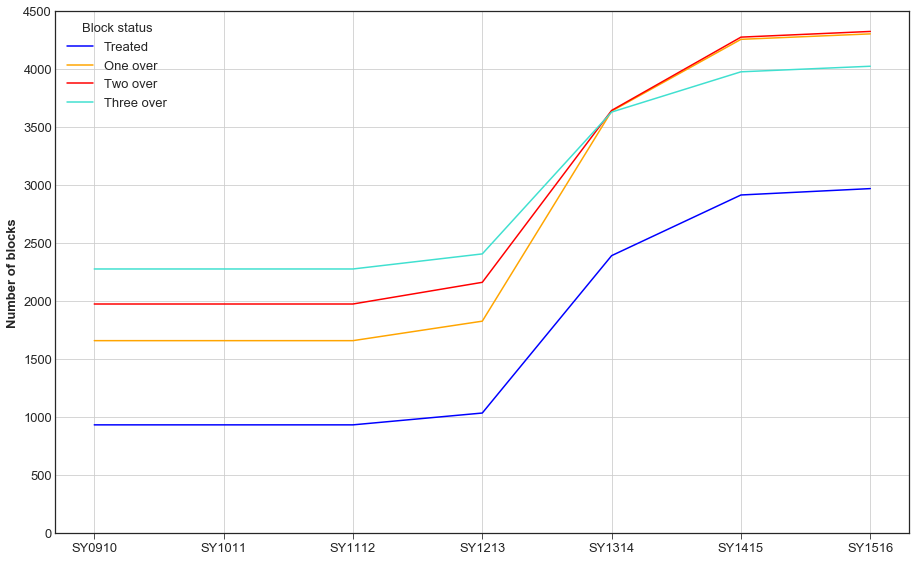

In [37]:
fig, ax = plt.subplots()
add_block_group_2(dummy_trend, ax, 'Treated', 'blue')
add_block_group_2(dummy_trend, ax, 'One over', 'orange')
add_block_group_2(dummy_trend, ax, 'Two over', 'red')
add_block_group_2(dummy_trend, ax, 'Three over', 'turquoise')

ax.grid(True)
ax.set_ylim(0, 4500)
ax.set_xlabel('')
ax.set_ylabel('Number of blocks')

ax.tick_params(axis='x', length=6, which='major')
ax.legend(title='Block status', loc='upper left')
plt.tight_layout()
plt.savefig('../../docs/figures/blocktrend.png', dpi=800, transparent=True);

## Plot violent crime trends

### Hourly counts

Color scheme will be reversed by `save_to_jekyll` function.

In [38]:
def plot_violent_trends():
    """Plots the heatmaps of the violent crimes
    
    Parameters
    ----------
    Nothing
    
    Returns
    -------
    alt.vconcat Chart
    """
    single = alt.selection_single(on='click', encodings=['x'])

    month = alt.Chart().mark_rect().encode(
        x=alt.X(
            'Date:O', timeUnit='year', axis=alt.Axis(title='Year',
                                                     labelAngle=-60)),
        y=alt.Y('Date:O', timeUnit='month', axis=alt.Axis(title='Month')),
        color=alt.condition(
            single,
            alt.Color(
                'mean(count):Q',
                legend=alt.Legend(title="Mean violent crime count"),
                scale=alt.Scale(scheme='redyellowgreen')),
            alt.value('lightgray'))).properties(selection=single)

    hours = alt.Chart().mark_rect().encode(
        x=alt.X(
            'Date:O',
            timeUnit='hours',
            axis=alt.Axis(title='Hour of Day', labelAngle=-60)),
        y=alt.Y('Date:O', timeUnit='month', axis=alt.Axis(title='Month')),
        color=alt.Color(
            'mean(count):Q',
            legend=alt.Legend(title="Mean violent crime count"),
            scale=alt.Scale(scheme='redyellowgreen')),
    ).transform_filter(single)

    return alt.vconcat(
        month,
        hours,
        data=hourly_counts.query('violent == 1'),
        resolve=alt.Resolve(
            scale=alt.LegendResolveMap(color=alt.ResolveMode('independent'))))

We won't display the figure as it is too large for the notebook. We will only use this one for exporting it for the website. On the website you can find it as the two interactive heatmaps of the mean violent crime count (first page).

In [39]:
violent_trend = plot_violent_trends()

In [40]:
save_to_jekyll(violent_trend, 'violent_trend', reverse_colors=True)

## Violent crimes split by FBI Code

In [41]:
with (data_path / 'processed/figures/yearly_violent_FBI.pkl').open('rb') as f:
    yearly_violent_FBI = pickle.load(f)
yearly_violent_FBI.head()

,FBI Code,Date,count
0,01A,2006,471
1,01A,2007,447
2,01A,2008,513
3,01A,2009,460
4,01A,2010,438


In [42]:
yearly_violent_FBI['FBI Code'] = yearly_violent_FBI['FBI Code'].map({
    '01A': 'Homicide 1st & 2nd degree',
    '02': 'Criminal sexual assault',
    '03': 'Robbery',
    '04A': 'Aggravated assault',
    '04B': 'Aggravated battery'
})

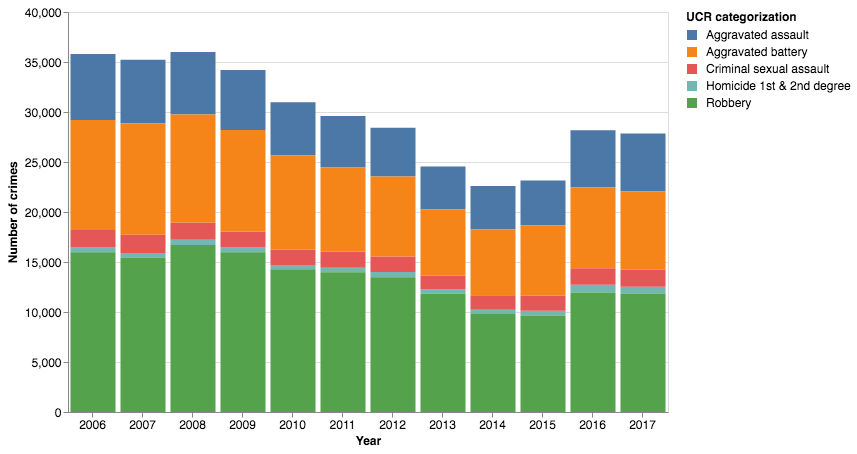

In [43]:
violent_FBI = format_chart(
    alt.Chart(yearly_violent_FBI).mark_bar().encode(
        alt.X('Date:O', axis=alt.Axis(title='Year', labelAngle=0)), 
        alt.Y('count', axis=alt.Axis(title='Number of crimes')),
        alt.Color(
            'FBI Code:N',
            title='UCR categorization'
            ),
        tooltip='count'))
violent_FBI

In [44]:
save_to_jekyll(violent_FBI, 'violent_FBI')

## Illustration of difference in differences (DiD)

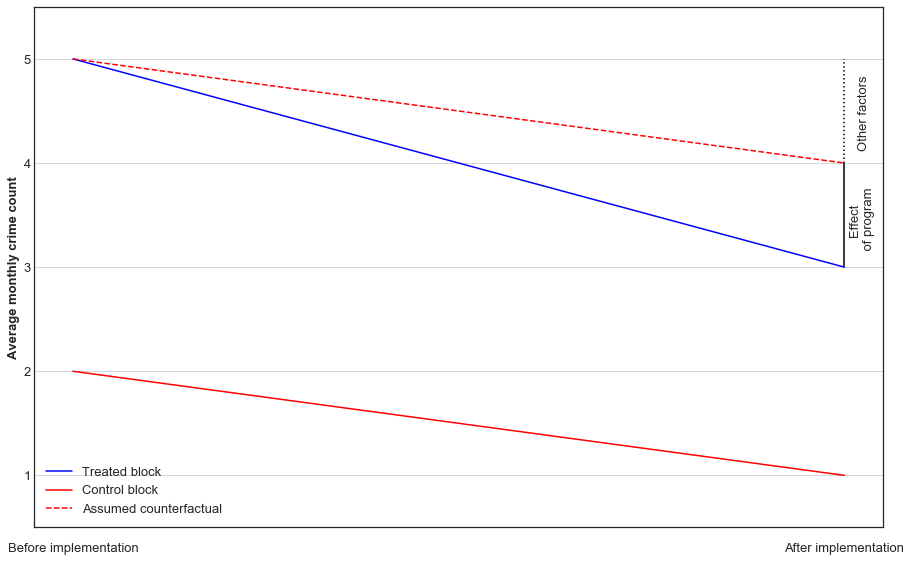

In [45]:
x_labels = ['Before implementation', 'After implementation']
fig, ax = plt.subplots()

# fig.subplots_adjust(left=0.1)
ax.plot(x_labels, [5, 3], color='blue', label='Treated block')
ax.plot(x_labels, [2, 1], color='red', label='Control block')

# Add estimated counterfactual
ax.plot(x_labels, [5, 4], color='red', linestyle='dashed', label='Assumed counterfactual')

# Add treatment effect
ax.vlines('After implementation', 3, 4, colors='black')
plt.figtext(0.934, 0.623, 'Effect\n of program', rotation=90, horizontalalignment='center')

# Add share which is attributable to other factors
ax.vlines('After implementation', 4, 5, colors='black', linestyles='dotted')
plt.figtext(0.93, 0.842, 'Other factors', rotation=90)

ax.legend(loc='lower left')
ax.set_ylim((0.5, 5.5))
ax.set_ylabel('Average monthly crime count')
ax.yaxis.grid(True)
ax.tick_params(axis='x', which='major', pad=15)
plt.tight_layout()
plt.savefig('../../docs/figures/didfigure.png', dpi=800, transparent=True);